In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# print(housing.data[0:5])
import pprint  #打印的格式比较 好看

pprint.pprint(housing.data[0:5])
print('-'*50)
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
--------------------------------------------------
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

#拆分训练集和测试集，random_state是随机种子,同样的随机数种子，是为了得到同样的随机值
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
# 训练集
print(x_train.shape, y_train.shape)
# 验证集
print(x_valid.shape, y_valid.shape)
# 测试集
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [20]:
#看特征数目
x_train_scaled.shape[1:]

(8,)

In [21]:
x_train_scaled[1] #标准化后的值看一下

array([-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
       -0.006034  ,  1.08055484, -1.06113817])

In [10]:
x_train.shape[1:]

(8,)

In [12]:
#回归模型我们只需要1个数
#因为输入是规范的，不需要展平层
#Dense是全连接层
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),#结果层只有1个节点
])
model.summary()
#mean_squared_error是均方误差，回归问题会使用均方误差
model.compile(loss="mean_squared_error", optimizer= "sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
8*30+30

270

In [13]:
#想知道模型有多少层
model.layers

In [14]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(8, 30) dtype=float32, numpy=
 array([[ 0.08084935, -0.1669038 , -0.19088472, -0.27978444, -0.1679514 ,
          0.3439761 ,  0.15835723,  0.13278821, -0.03975961, -0.05423462,
         -0.38408095,  0.19770917, -0.08556625, -0.11299601,  0.19407436,
          0.0668053 ,  0.2333363 ,  0.3299044 ,  0.14632699,  0.2857994 ,
          0.31638888,  0.35575977,  0.01698652,  0.19829038,  0.01909122,
          0.13675222,  0.3040826 , -0.10293987,  0.20537433,  0.32875797],
        [ 0.02047515, -0.32100064,  0.3004944 ,  0.04241398,  0.07508701,
          0.31354448, -0.1262132 ,  0.24618521,  0.20747295,  0.32060692,
          0.02774078,  0.00812739, -0.2377891 ,  0.10643634,  0.08575252,
         -0.13878348,  0.23826733, -0.28035977, -0.00761607, -0.1999915 ,
          0.30469975, -0.11788261,  0.13926503, -0.17846704,  0.14149204,
         -0.3855187 , -0.35735604,  0.04233781,  0.27586958, -0.18761039],
        [ 0.03181916,  0.04078138, -0.35070

In [16]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3305 - val_loss: 0.3482
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3318 - val_loss: 0.3658
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3304 - val_loss: 0.3528
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3288 - val_loss: 0.3460
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3278 - val_loss: 0.3536
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3312 - val_loss: 0.3493
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3271 - val_loss: 0.3497
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3511
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3261 - val_loss: 0.3503


In [17]:
11610/363

31.983471074380166

In [25]:
#通过diff来看前后的差值
pd.DataFrame(history.history['val_loss']).diff(1)

0
0        NaN
1  -0.479071
2  -0.226476
3  -0.027986
4  -0.016547
5  -0.000437
6   0.001562
7  -0.012442
8  -0.008003
9  -0.001158
10 -0.006124
11  0.001731
12  0.009236
13 -0.006070
14 -0.002125
15 -0.003809
16 -0.006787
17  0.000597
18  0.004165
19 -0.000002
20  0.003588
21 -0.009319

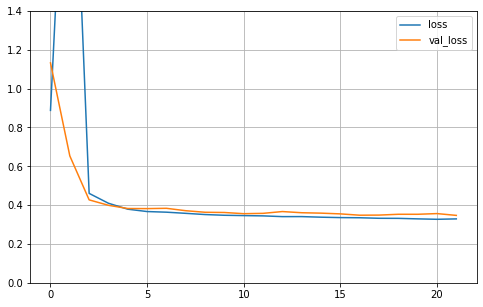

In [26]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.4)
    plt.show()
plot_learning_curves(history)

In [27]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.34720897674560547

In [28]:
np.tanh(-1000)

-1.0